In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

Well look at some of the data

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

seeing if there is any null in the data


In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

What are the data types of the columns

In [6]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [8]:
data['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [9]:
data['blue'] = data['blue'].astype(object)

In [10]:
data.corr().style.background_gradient(cmap = "Blues")

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\746379743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap = "Blues")


,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


In [11]:
columns = data.columns[data.any()].tolist()
a = []
b = []
for item in columns:
  a.append(data[item].min())
  b.append(data[item].max())
df = pd.DataFrame(columns, columns = ['Col'])
df['min']= a
df['max'] = b
df

,Col,min,max
0,battery_power,501.0,1998.0
1,blue,0.0,1.0
2,clock_speed,0.5,3.0
3,dual_sim,0.0,1.0
4,fc,0.0,19.0
5,four_g,0.0,1.0
6,int_memory,2.0,64.0
7,m_dep,0.1,1.0
8,mobile_wt,80.0,200.0
9,n_cores,1.0,8.0


In [12]:
# get columns whose min is 0 and max is 1
cols = data.columns[(data.min() == 0) & (data.max() == 1)]

# print the selected columns
print(cols)

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')


In [13]:
data[cols] = data[cols].astype('object')
print(data[cols].dtypes)

blue            object
dual_sim        object
four_g          object
three_g         object
touch_screen    object
wifi            object
dtype: object


# categorical features



In [14]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
cat_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Numerical Features

In [15]:
num_features = [i for i in data.columns if data.dtypes[i] in ['int64', 'float']]
num_features[: -1]
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'price_range']

In [16]:
data.loc[:,'price_range'].value_counts()



1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

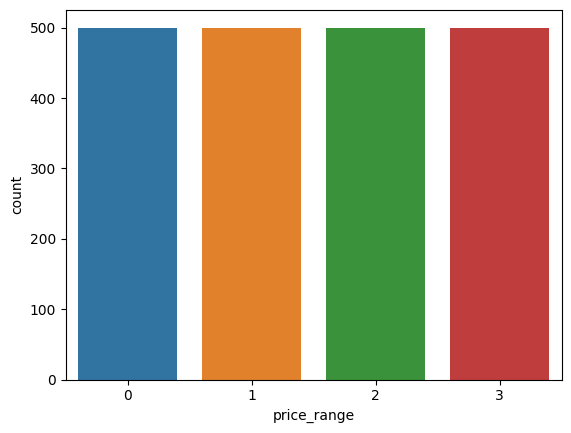

In [17]:
sns.countplot(x = 'price_range',data = data)


C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3124321616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True, linewidth = 2 )


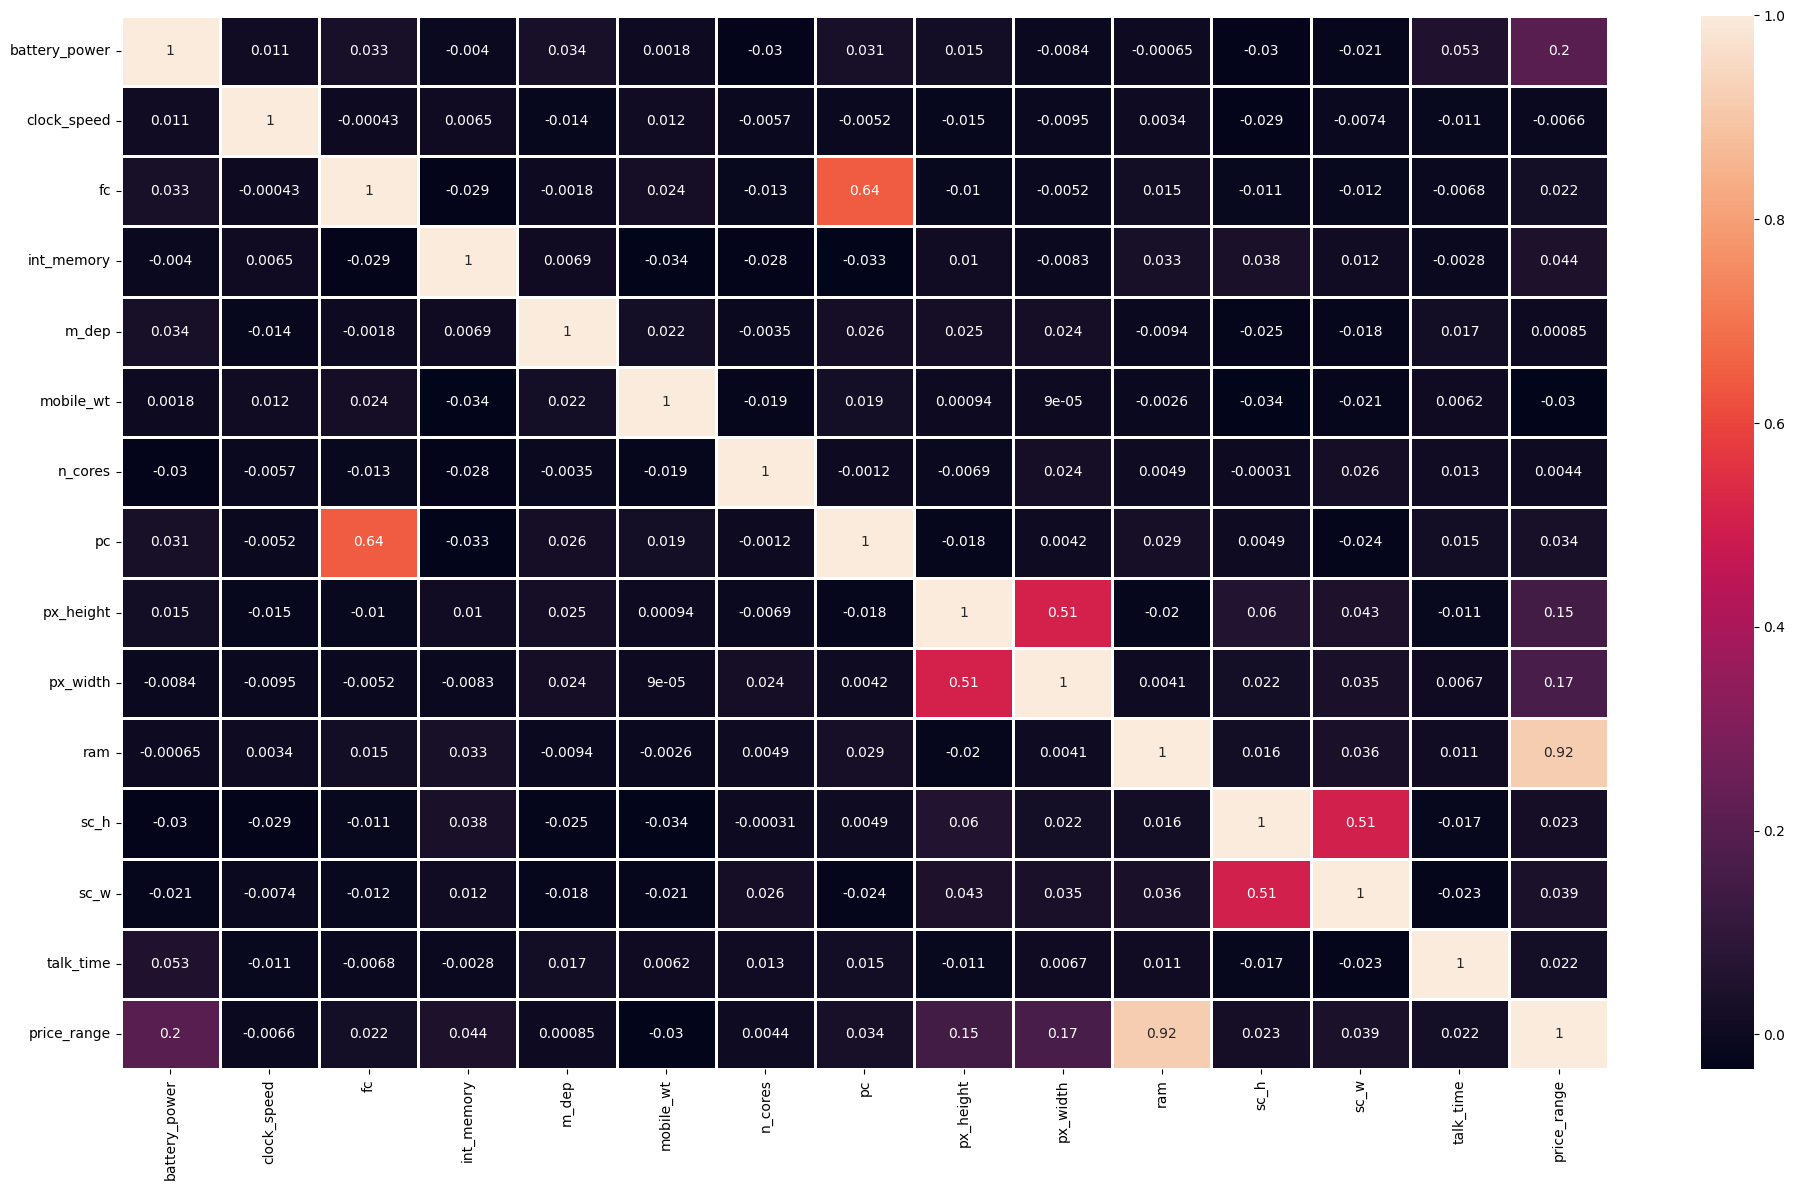

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot = True, linewidth = 2 )
plt.tight_layout()

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\1726693767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10),


<Axes: title={'center': 'Correlation with target feature'}>

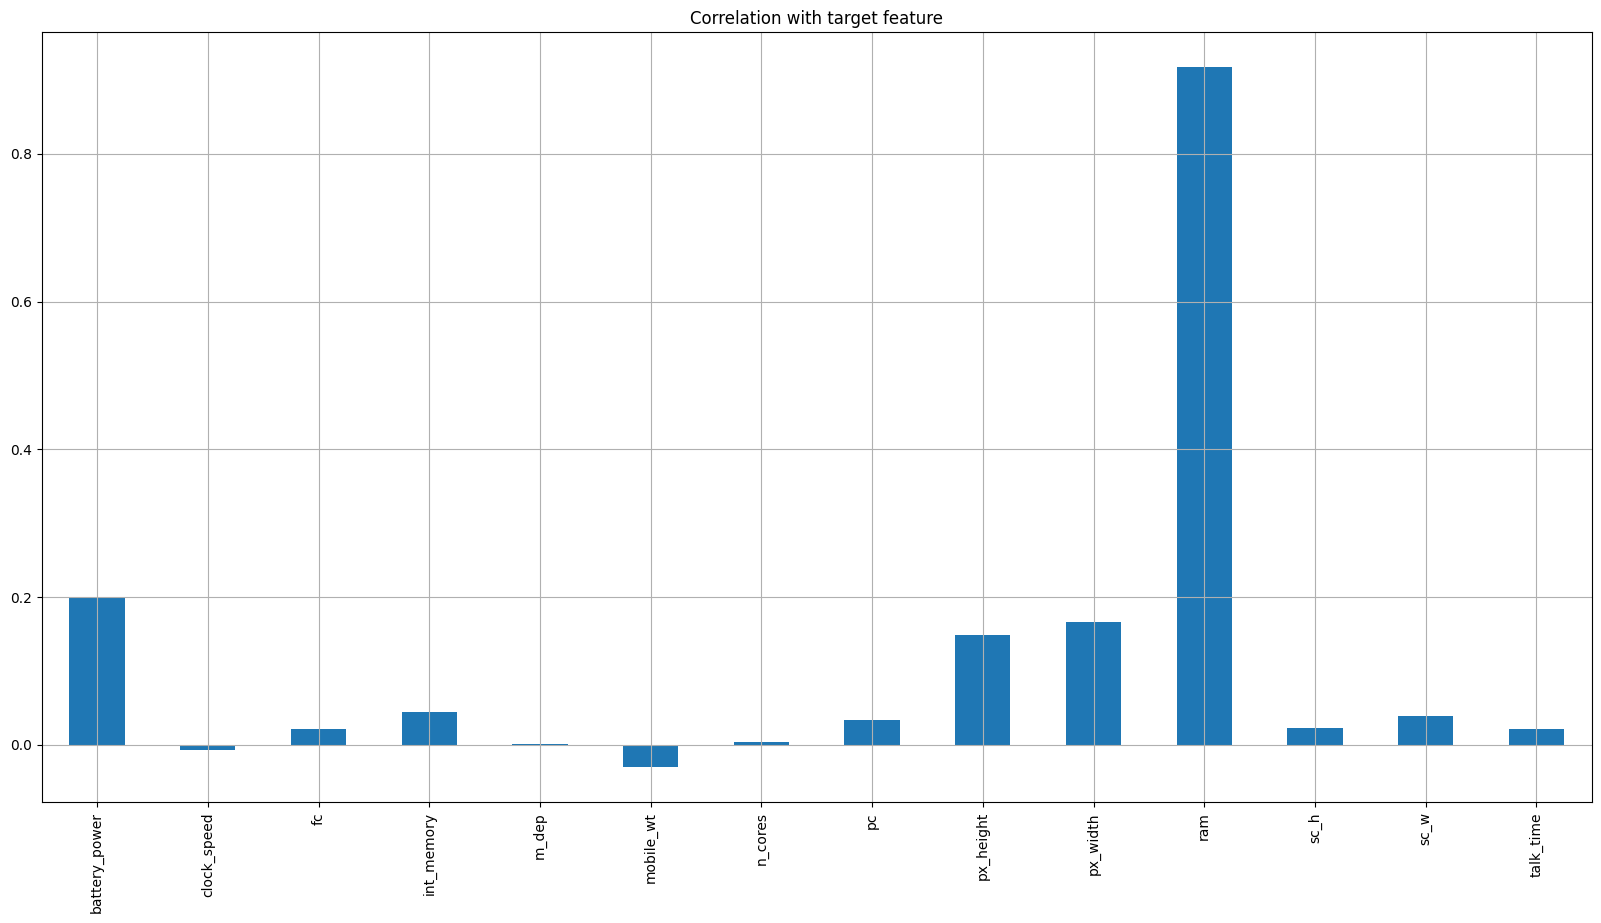

In [19]:
data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10), 
                                                                 title = 'Correlation with target feature')



# Exploring Numerical Features

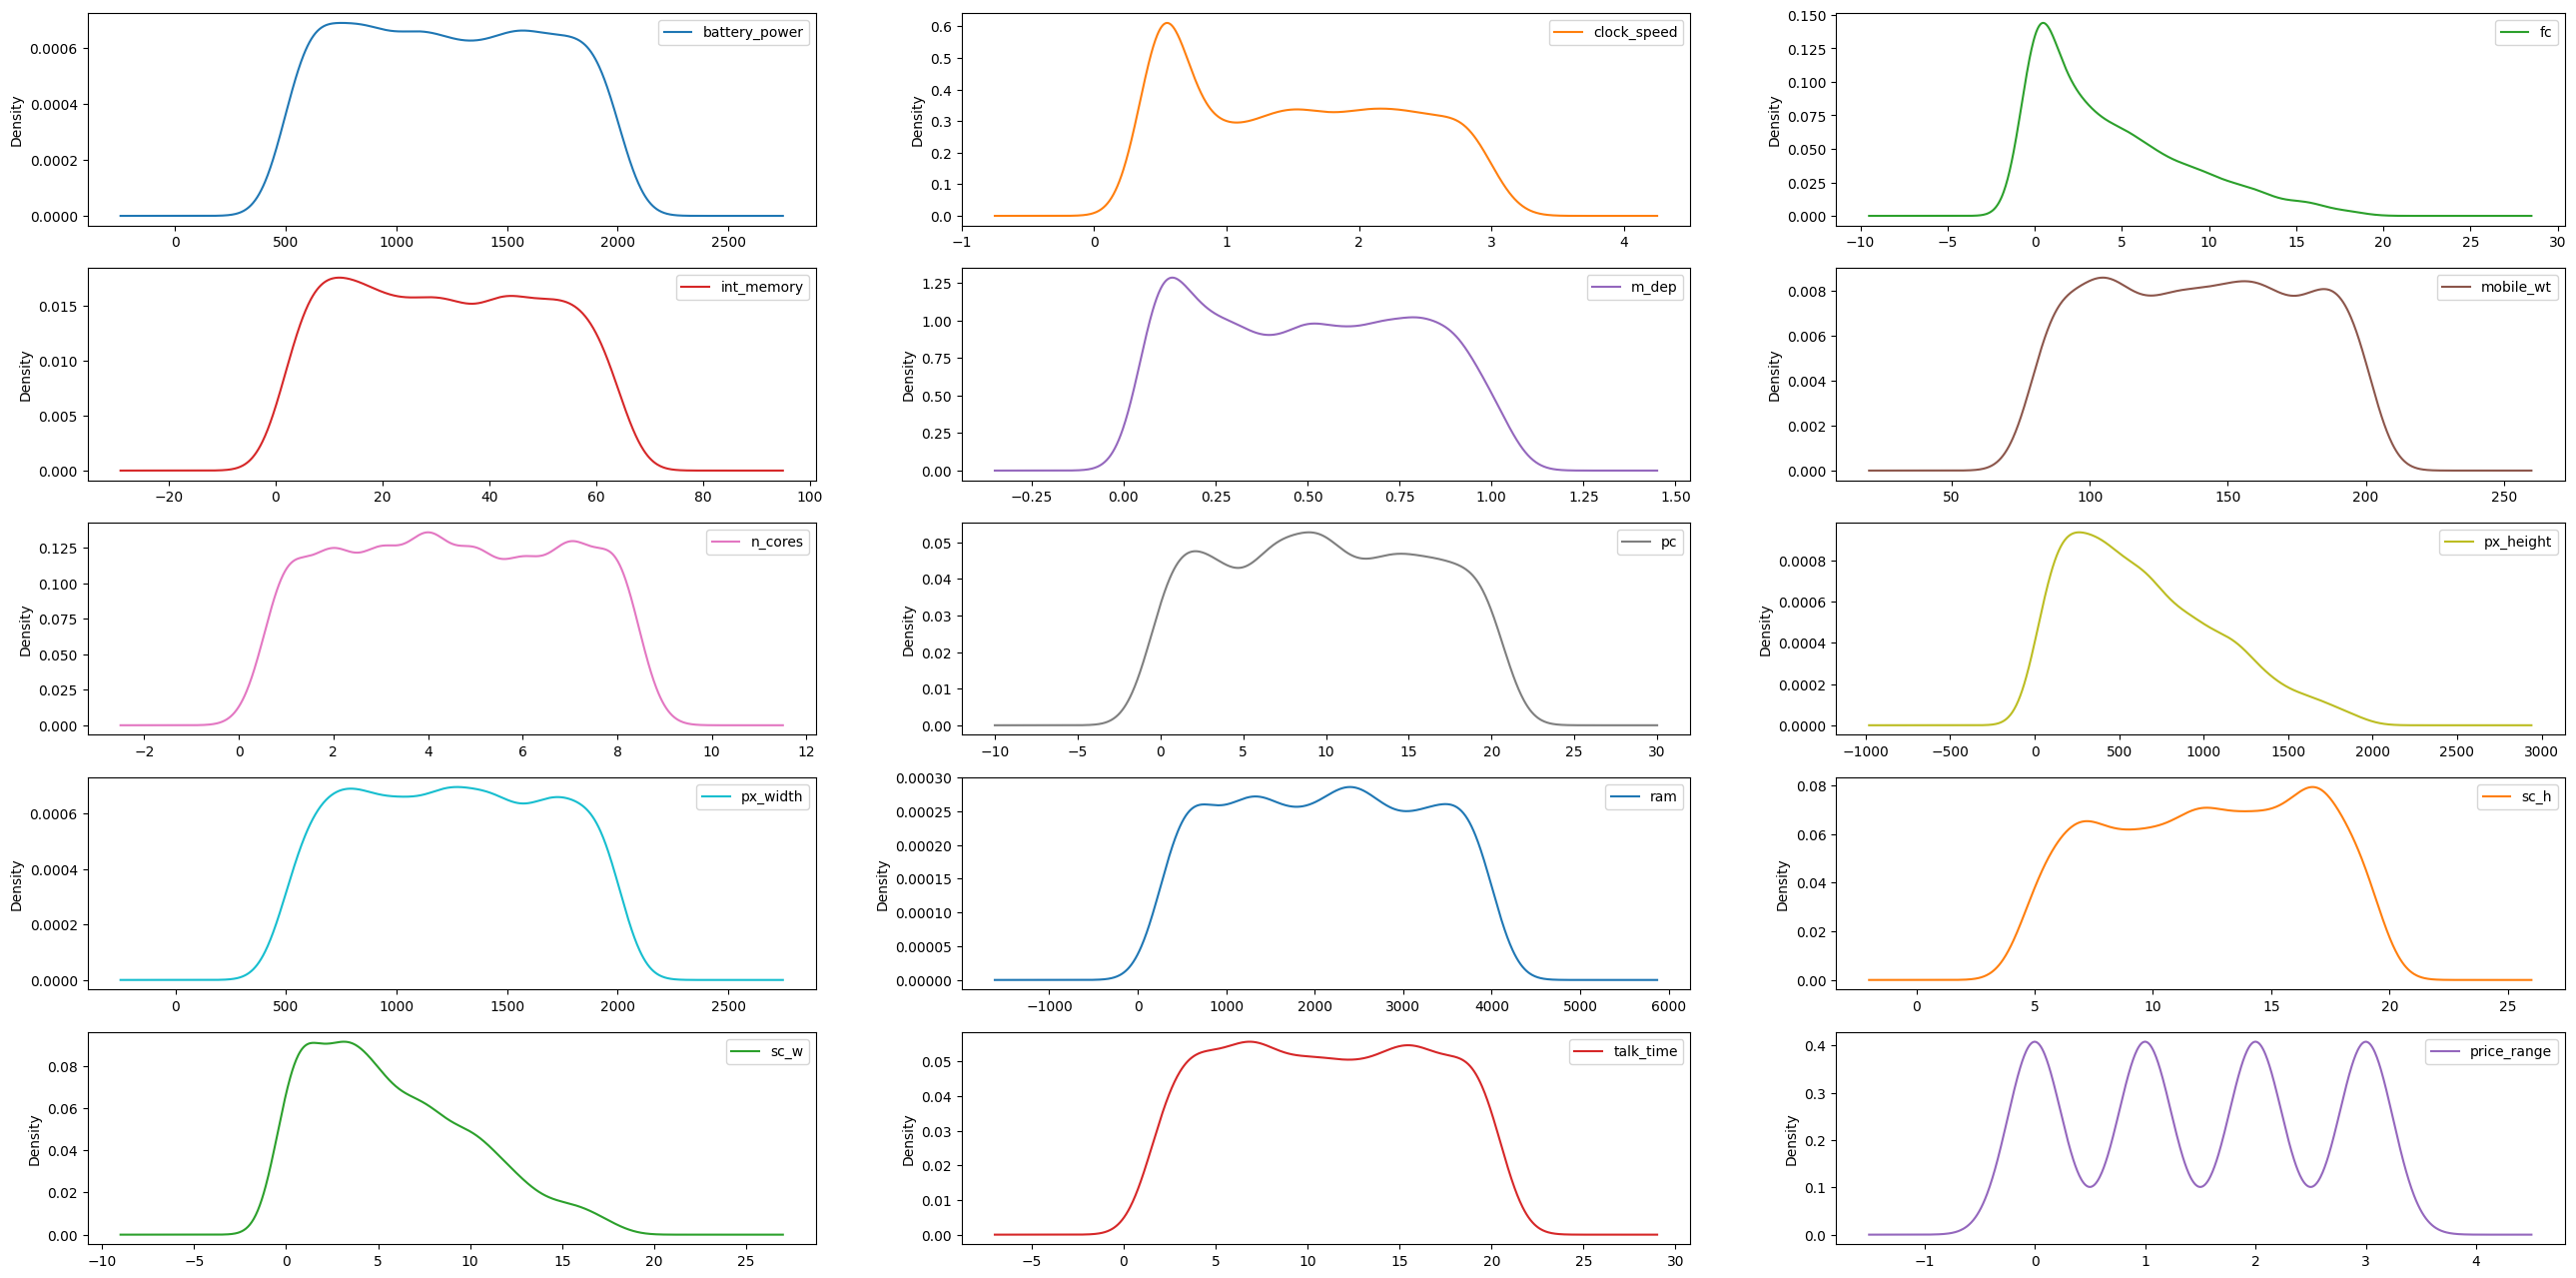

In [20]:
data[num_features].plot(kind='density', layout = (5,3),subplots=True,sharex=False,figsize=(32,16))


plt.show()


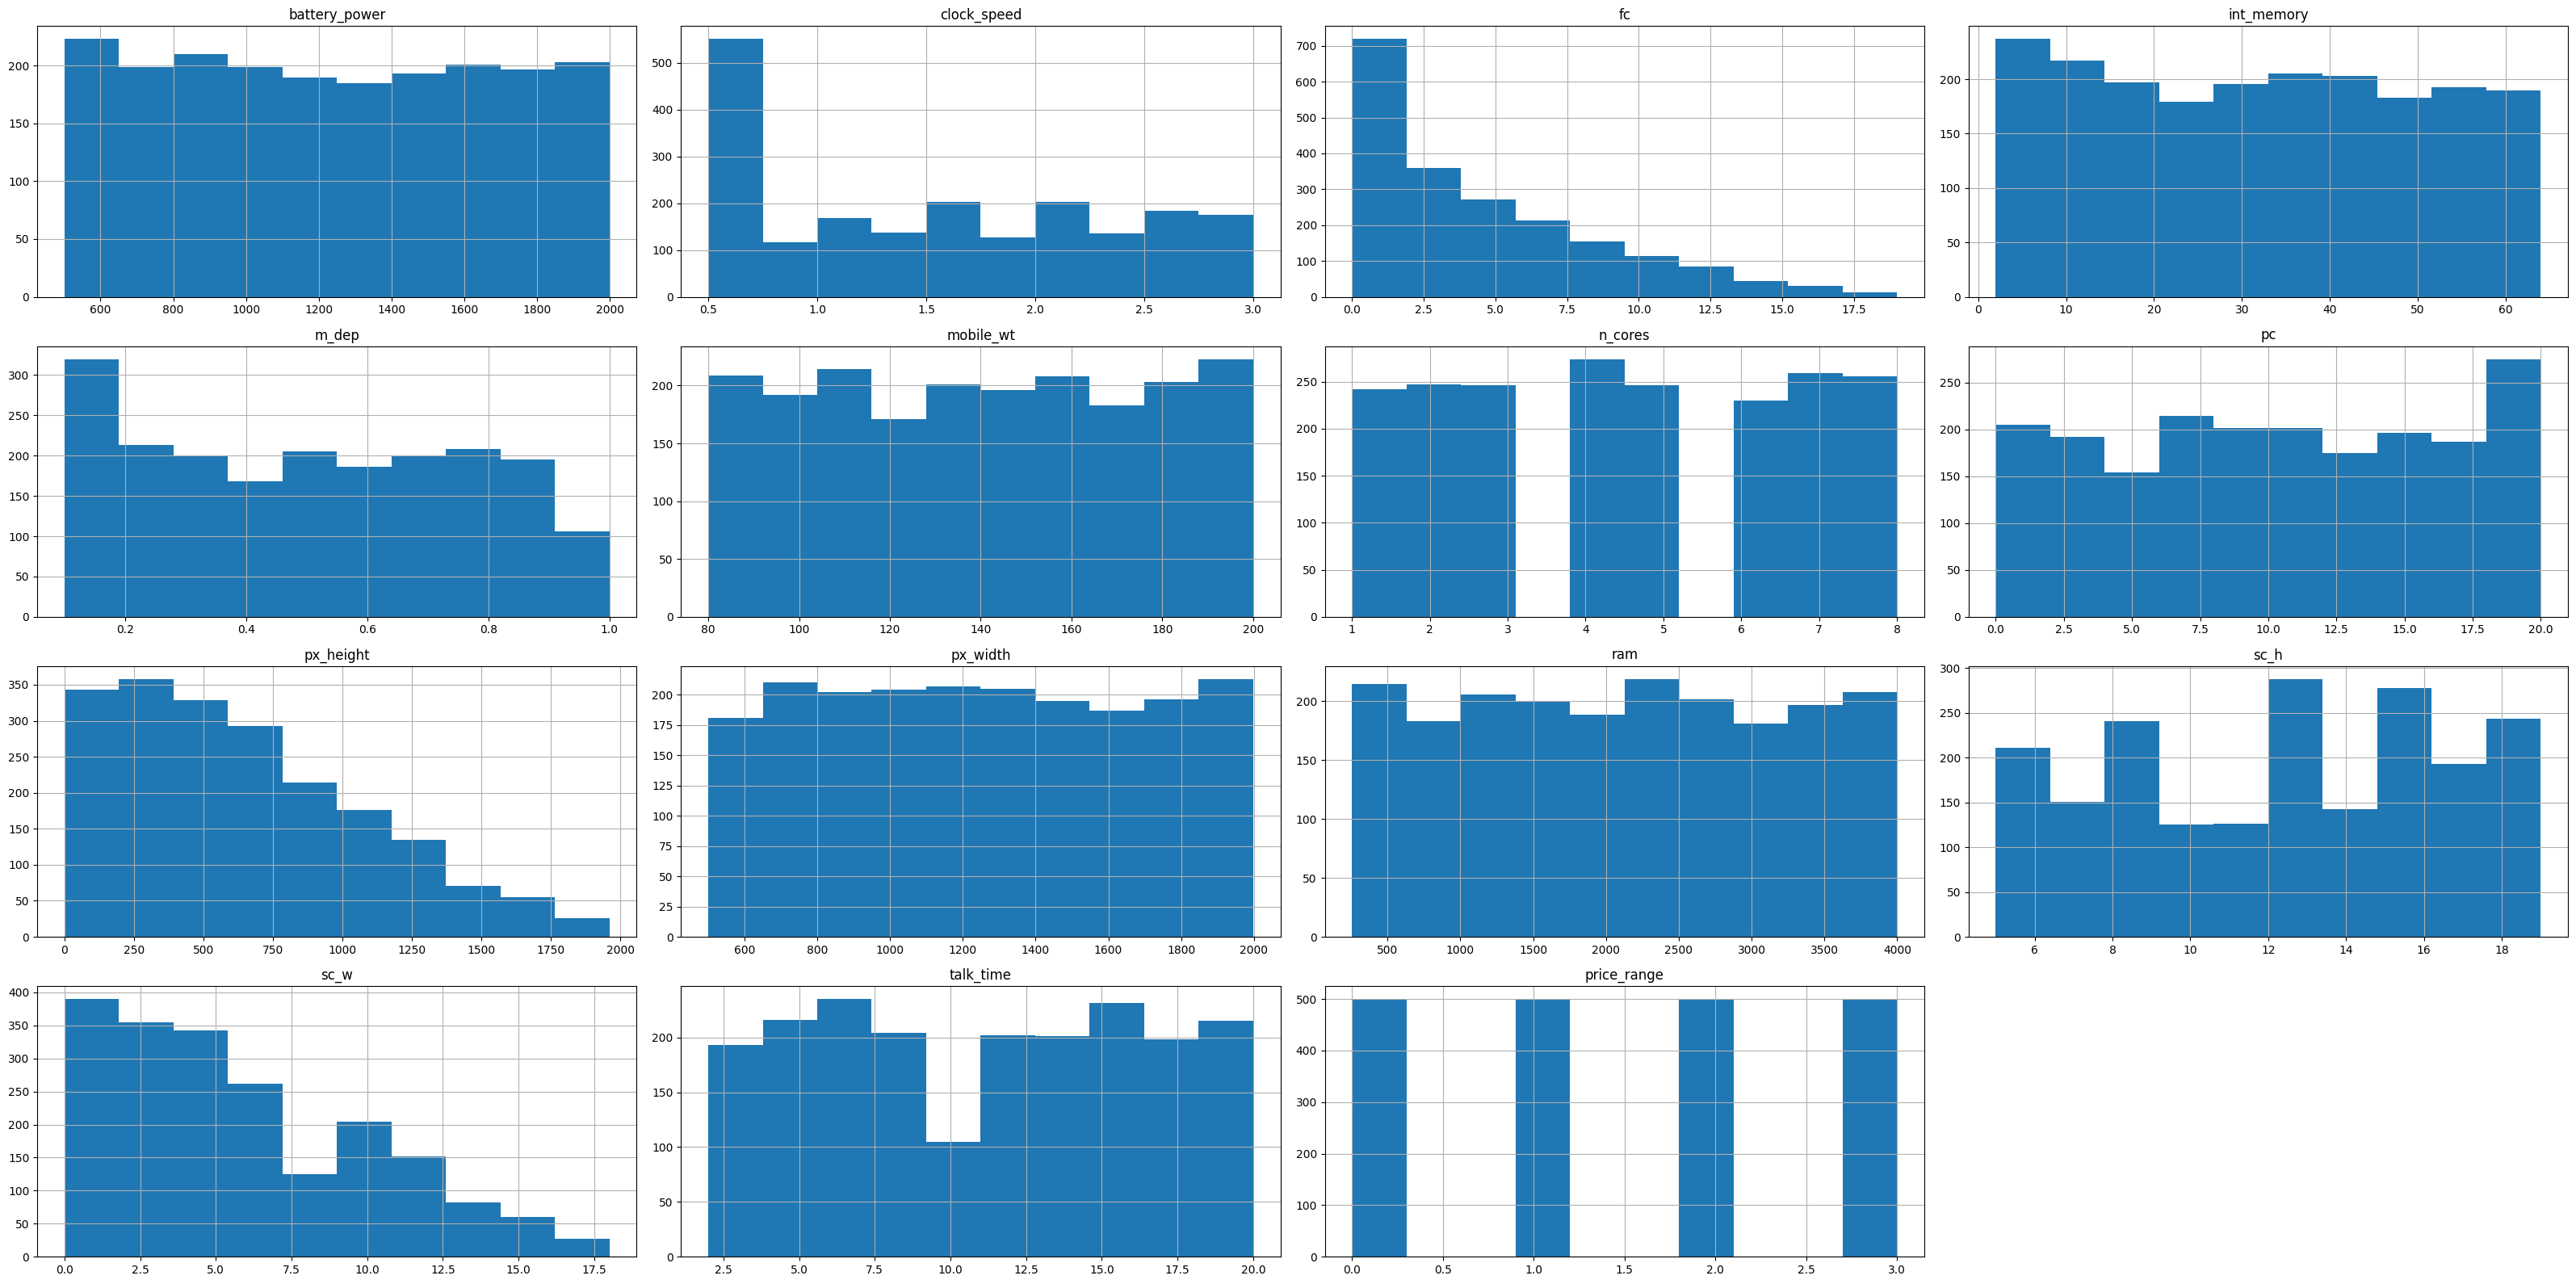

In [21]:
data.hist(figsize=(32,16))
plt.tight_layout()


C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3222173388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fc'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


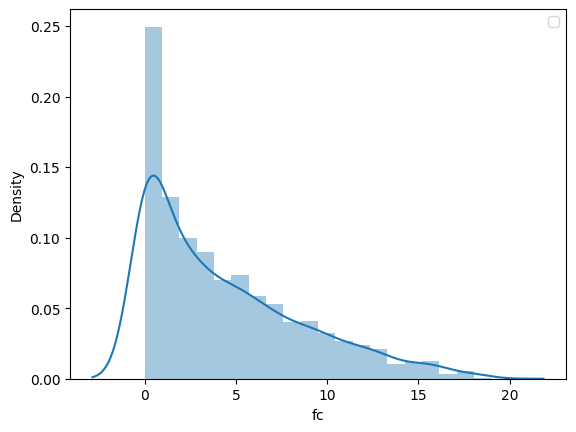

In [22]:
fig = plt.figure(2)
sns.distplot(data['fc'])
plt.legend()


In [23]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


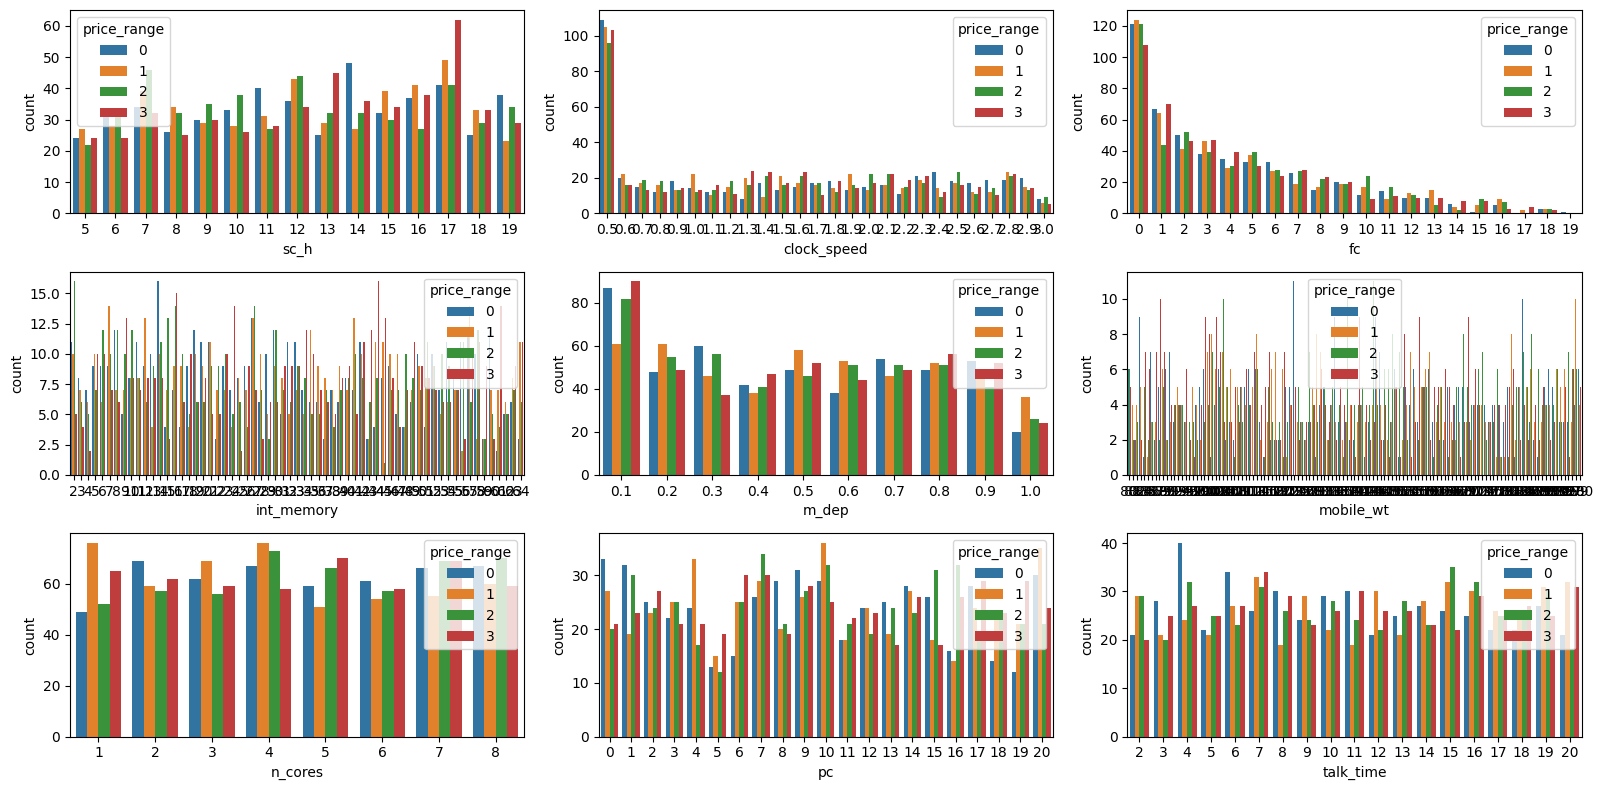

In [24]:
fig, ax = plt.subplots(3,3,figsize = (16,8))
sns.countplot(x=num_features[11],hue='price_range', data=data,ax = ax[0,0])
sns.countplot(x=num_features[1],hue='price_range', data=data,ax = ax[0,1])
sns.countplot(x=num_features[2],hue='price_range', data=data,ax = ax[0,2])
sns.countplot(x=num_features[3],hue='price_range', data=data,ax = ax[1,0])
sns.countplot(x=num_features[4],hue='price_range', data=data,ax = ax[1,1])
sns.countplot(x=num_features[5],hue='price_range', data=data,ax = ax[1,2])
sns.countplot(x=num_features[6],hue='price_range', data=data,ax = ax[2,0])
sns.countplot(x=num_features[7],hue='price_range', data=data,ax = ax[2,1])
sns.countplot(x=num_features[13],hue='price_range', data=data,ax = ax[2,2])

fig.tight_layout()


In [25]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (5,5))
    sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
    sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
    sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
    sns.kdeplot(data[data[target]==3][column], alpha=0.5,shade = True, color="#fccc79", label='3', ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

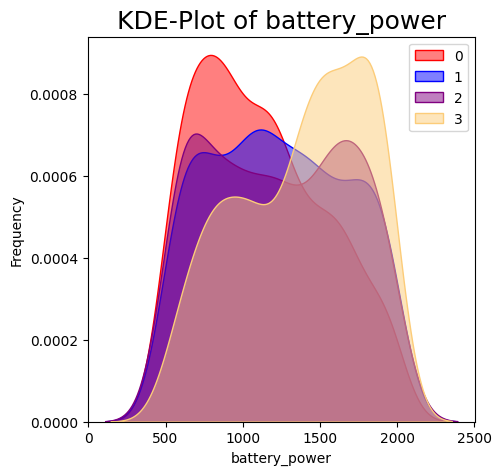

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

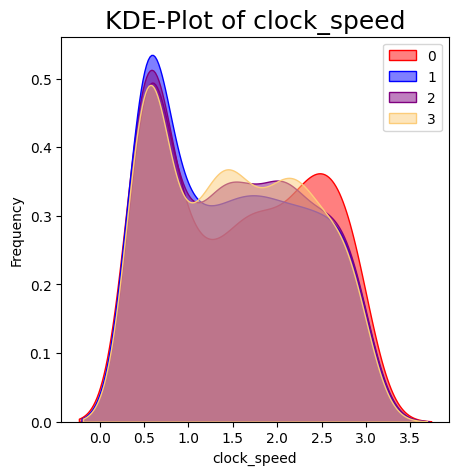

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

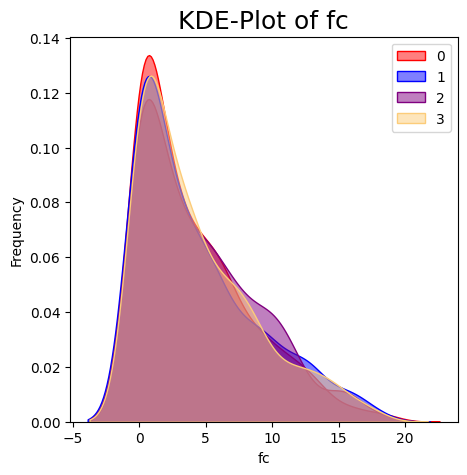

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

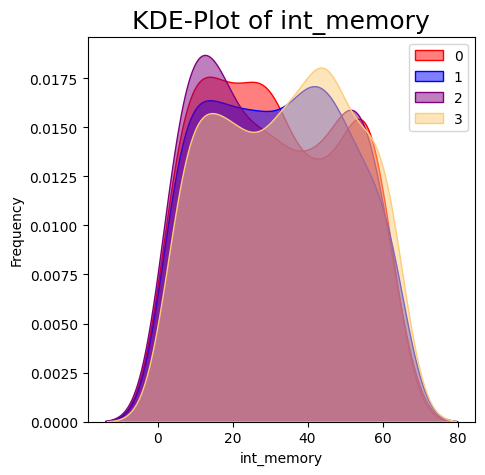

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

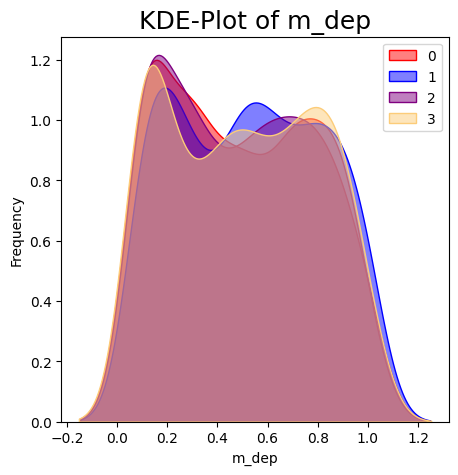

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

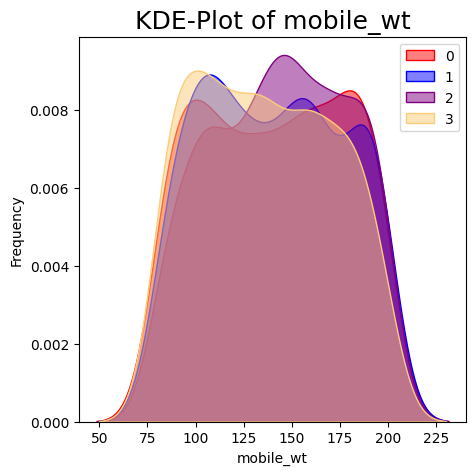

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

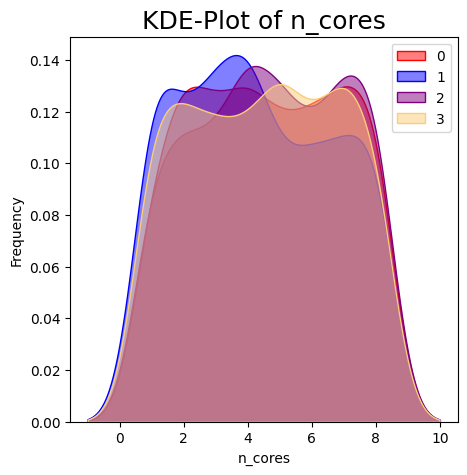

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

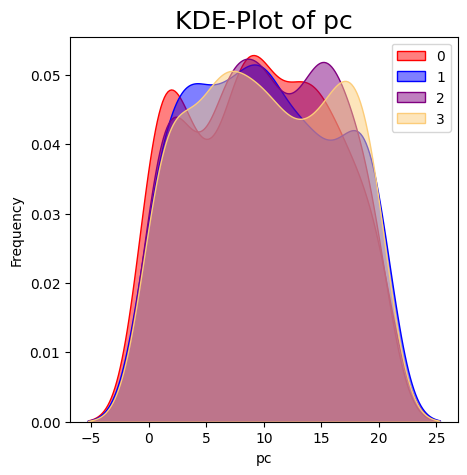

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

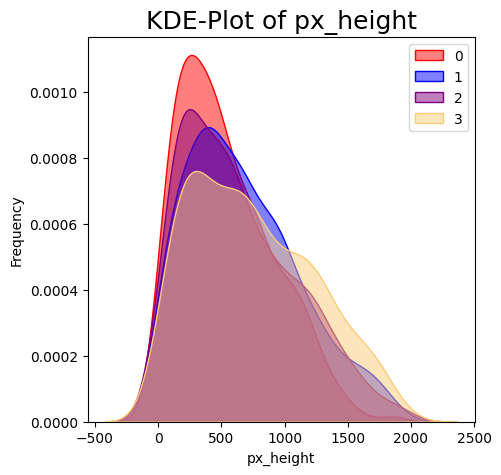

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

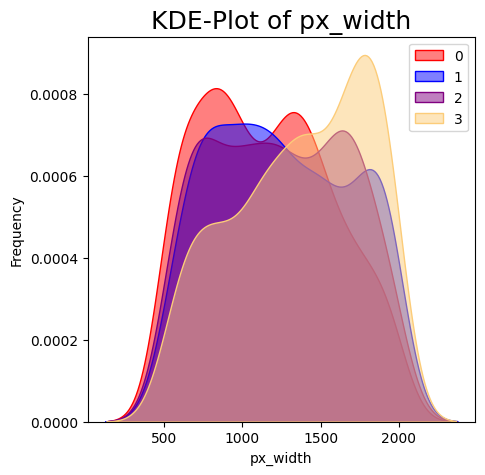

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

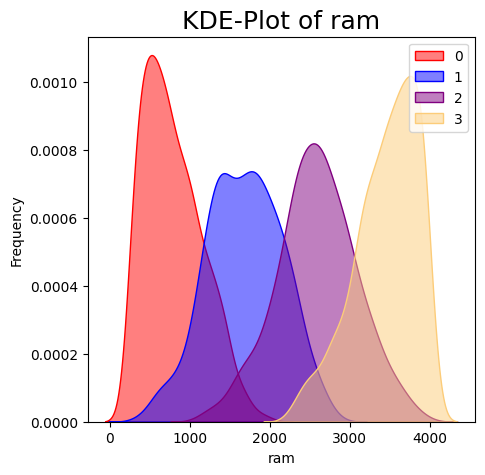

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

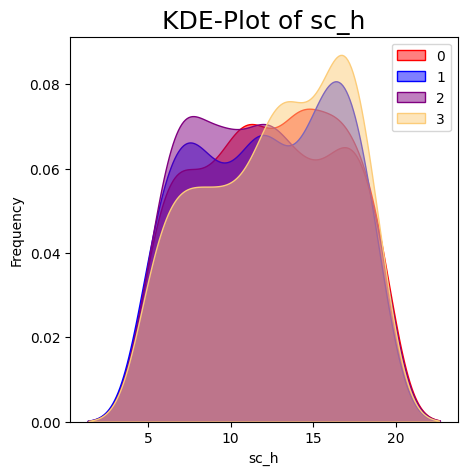

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

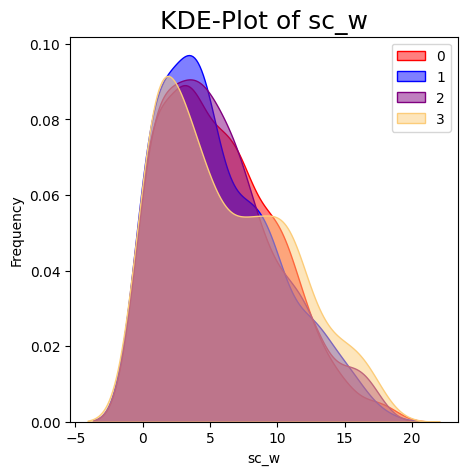

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
C:\Users\sharm\AppDat

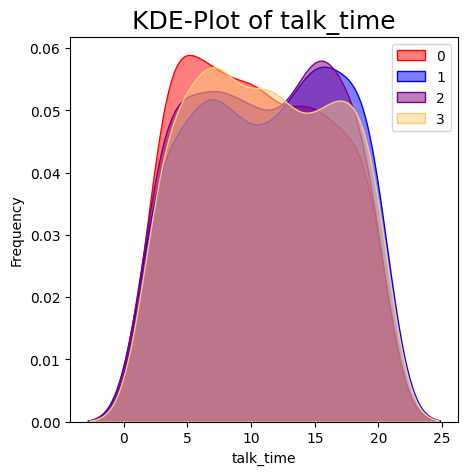

C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
C:\Users\sharm\AppData\Local\Temp\ipykernel_15864\3922624553.py:

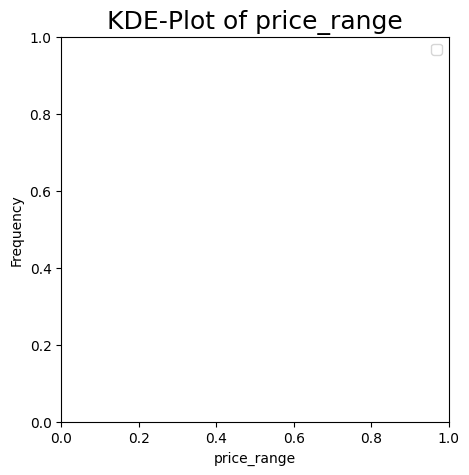

In [26]:
for column in num_features:
    kde_numerical_features(column, "price_range")

# Now for the algorithm implementation


In [60]:
final_df = data[num_features]
X = final_df.drop(columns=['price_range'],axis=1)
y = final_df['price_range']



,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


Scaling data to make good
# important dont scale cat data

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X_scaled_list = standardizer.fit_transform(X)
num_data = np.array(X_scaled_list)
cat_data = np.array(data[cat_features].values.tolist())

In [114]:
X_scaled = np.concatenate((num_data,cat_data), axis=1)
X_scaled = X_scaled.tolist()
X_scaled

[[-0.9025972554689959,
  0.8307794171595057,
  -0.7624946625030504,
  -1.3806435313202894,
  0.34073950535281977,
  1.3492488095807782,
  -1.10197128209058,
  -1.3057501043508444,
  -1.4089485628999447,
  -1.1467840342018796,
  0.3917034064711061,
  -0.7849832923777195,
  0.2831028012669145,
  1.4624933239839086,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [-0.49513856507006043,
  -1.253064196519815,
  -0.9928903907106499,
  1.1550242242836197,
  0.6875481622004737,
  -0.12005943732924378,
  -0.6647678374999909,
  -0.6459887934933469,
  0.5857779134312672,
  1.7044646757511204,
  0.4673170183062863,
  1.1142655626114704,
  -0.6353166675633032,
  -0.7342672077230512,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0],
 [-1.5376864991634263,
  -1.253064196519815,
  -0.532098934295451,
  0.49354567934346943,
  1.3811654758957816,
  0.13424391309749079,
  0.2096390516811874,
  -0.6459887934933469,
  1.3926842168511246,
  1.0749682073199385,
  0.44149773621622473,
  -0.310171078630422,
  -0.86492153

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RANDOM_STATE = 55

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [106]:
""" print(f"target proportion: {sum(y_train)/len(y_train)}") """
y_train

1738    1
548     2
936     3
1389    0
1607    2
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1500, dtype: int64

In [107]:
min_samples_split_list = [2,10,30,50,100,200,300,700] #integer gives actual sample quantity
max_depth_list = [1,2,3,4,8,16,32,64,None] # none means that there is no depth limit
n_estimators_list = [10,50,100,200,300,400,500]

# Finding hyperparameter minsamplesforsplitting

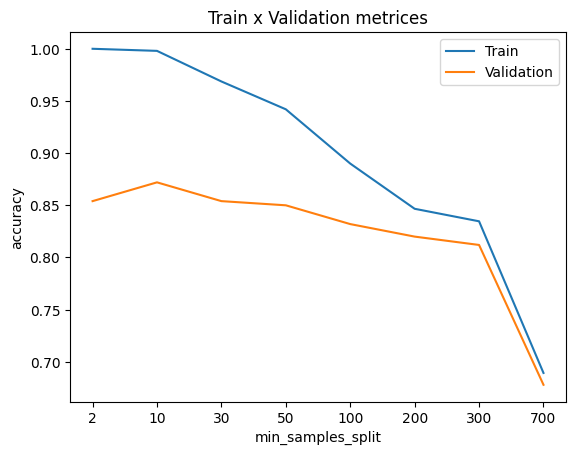

In [108]:
import matplotlib.pyplot as plt
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split= min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title("Train x Validation metrices")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train", "Validation"])

# Increasing min_samples_split 

Reduces the overfitting drastically train accuracy and test accuracy is near so min_sample_split = 200

# Max_depth hyperparameter

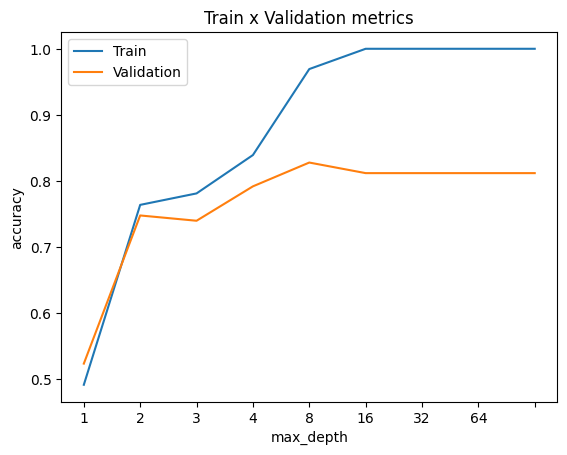

In [109]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# max_depth = 4  ideal case

# n_estimators

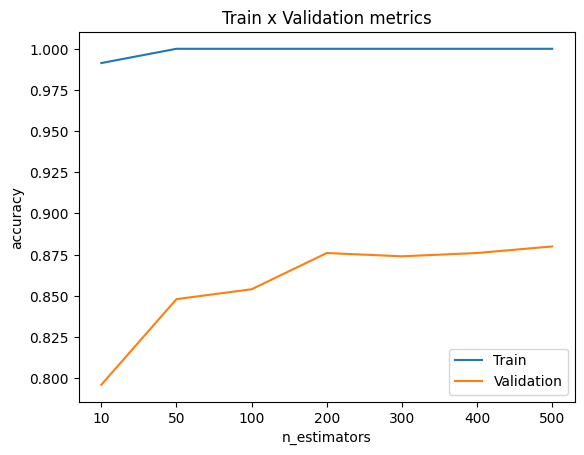

In [110]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# n_estimators = 200

In [61]:
random_forest_model = RandomForestClassifier(n_estimators = 200, max_depth = 4 , min_samples_split = 200).fit(X_train, y_train)

In [62]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8480
Metrics test:
	Accuracy score: 0.8300


# XG Boost

In [63]:
from xgboost import XGBClassifier
n = int(len(X_train)*0.8) 

In [64]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [65]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state=42)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-mlogloss:1.25072
[1]	validation_0-mlogloss:1.13982
[2]	validation_0-mlogloss:1.04782
[3]	validation_0-mlogloss:0.97080
[4]	validation_0-mlogloss:0.90189
[5]	validation_0-mlogloss:0.84400
[6]	validation_0-mlogloss:0.79500
[7]	validation_0-mlogloss:0.74989
[8]	validation_0-mlogloss:0.70865
[9]	validation_0-mlogloss:0.67332
[10]	validation_0-mlogloss:0.63985
[11]	validation_0-mlogloss:0.61032
[12]	validation_0-mlogloss:0.58539
[13]	validation_0-mlogloss:0.56333
[14]	validation_0-mlogloss:0.54201
[15]	validation_0-mlogloss:0.51980
[16]	validation_0-mlogloss:0.50278
[17]	validation_0-mlogloss:0.48422
[18]	validation_0-mlogloss:0.46603


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-mlogloss:0.44991
[20]	validation_0-mlogloss:0.43598
[21]	validation_0-mlogloss:0.42146
[22]	validation_0-mlogloss:0.41069
[23]	validation_0-mlogloss:0.40110
[24]	validation_0-mlogloss:0.39030
[25]	validation_0-mlogloss:0.37901
[26]	validation_0-mlogloss:0.37159
[27]	validation_0-mlogloss:0.36177
[28]	validation_0-mlogloss:0.35486
[29]	validation_0-mlogloss:0.34823
[30]	validation_0-mlogloss:0.34340
[31]	validation_0-mlogloss:0.33613
[32]	validation_0-mlogloss:0.33055
[33]	validation_0-mlogloss:0.32672
[34]	validation_0-mlogloss:0.32054
[35]	validation_0-mlogloss:0.31447
[36]	validation_0-mlogloss:0.31058
[37]	validation_0-mlogloss:0.30690
[38]	validation_0-mlogloss:0.30278
[39]	validation_0-mlogloss:0.29783
[40]	validation_0-mlogloss:0.29310
[41]	validation_0-mlogloss:0.28870
[42]	validation_0-mlogloss:0.28524
[43]	validation_0-mlogloss:0.28285
[44]	validation_0-mlogloss:0.28020
[45]	validation_0-mlogloss:0.27767
[46]	validation_0-mlogloss:0.27584
[47]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
xgb_model.best_iteration

103

In [67]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9753
Metrics test:
	Accuracy score: 0.8960


# logistic Regression

In [68]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)

In [69]:
import joblib
joblib.dump(logreg,r'./dataset/lg.sav')

['./dataset/lg.sav']

In [70]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.92      0.98      0.95       118
           2       0.99      0.91      0.95       120
           3       0.96      0.99      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [71]:
print(accuracy_score(y_val,y_pred))

0.962


Text(0.5, 427.9555555555555, 'Predicted label')

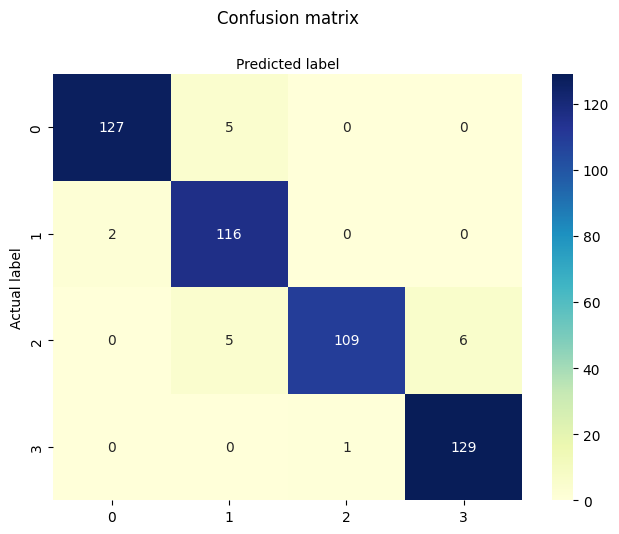

In [72]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



# Linear SVC

In [73]:
linear_svc = LinearSVC()

In [74]:
linear_svc.fit(X_train,y_train)

C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [75]:
y_pred = model.predict(X_val)

In [76]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       132
           1       0.82      0.86      0.84       118
           2       0.84      0.80      0.82       120
           3       0.92      0.92      0.92       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [77]:
print(accuracy_score(y_val,y_pred))

0.88


Text(0.5, 427.9555555555555, 'Predicted label')

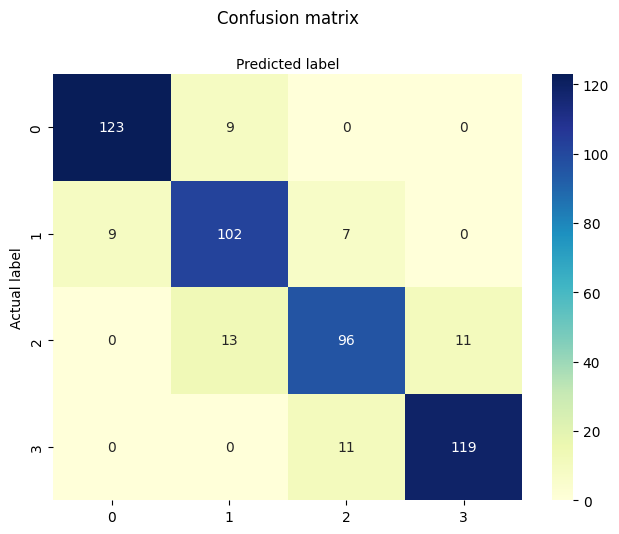

In [78]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNeighbour Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# acc = accuracy_score(y_val,y_pred)

# print(acc)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       132
           1       0.40      0.53      0.45       118
           2       0.46      0.48      0.47       120
           3       0.85      0.64      0.73       130

    accuracy                           0.58       500
   macro avg       0.61      0.58      0.59       500
weighted avg       0.62      0.58      0.59       500



# CAT Boosting

In [80]:
import catboost as cb
cb_clf = cb.CatBoostClassifier()

ModuleNotFoundError: No module named 'catboost'

In [82]:
cb_clf.fit(X_train,y_train)

NameError: name 'cb_clf' is not defined

In [81]:
y_pred = model.predict(X_val)

In [83]:
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       132
           1       0.82      0.86      0.84       118
           2       0.84      0.80      0.82       120
           3       0.92      0.92      0.92       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

0.88


Text(0.5, 427.9555555555555, 'Predicted label')

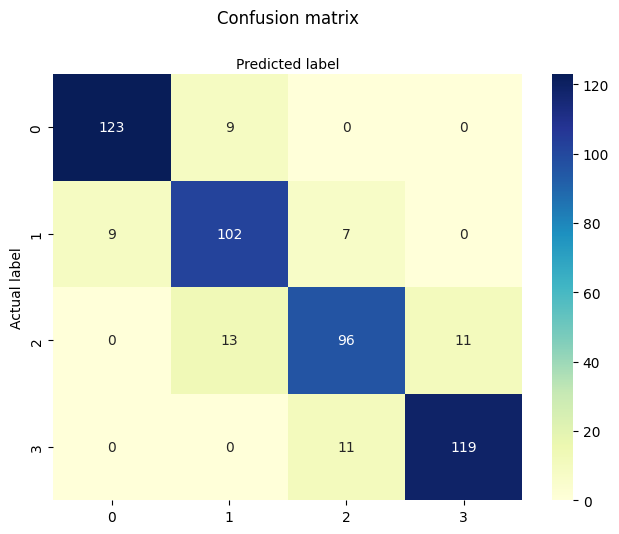

In [84]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LGBM Classifier

In [85]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val,y_pred))



              precision    recall  f1-score   support

           0       0.95      0.94      0.94       132
           1       0.86      0.92      0.89       118
           2       0.88      0.83      0.85       120
           3       0.92      0.91      0.91       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Text(0.5, 427.9555555555555, 'Predicted label')

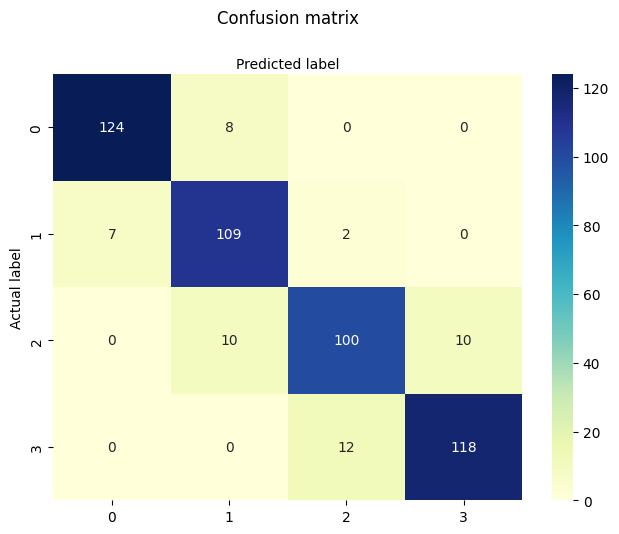

In [86]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')